# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Import Library yang dibutuhkan

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# **Load Dataset**

In [2]:
# Load Dataset

df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_Dropbox_1.csv")
df.head()

,userName,score,at,content
0,nana 1982,5,2024-08-01 08:32:54,AWas judi online
1,Arachman Rachman,1,2024-08-01 08:27:15,Asu
2,Tojang Idris,5,2024-07-27 11:04:46,Bagus
3,Idas Suwarno,5,2024-07-27 08:11:26,Saya kasih bintang 5 aplikasi sangat baik pert...
4,Johanes Satriyo,5,2024-07-27 07:51:12,Terima Kasih Banyak untuk produk yang sangat b...


In [3]:
# Menampilkan Column Content, Username, dan at.

df = df[['content']]
df

,content
0,AWas judi online
1,Asu
2,Bagus
3,Saya kasih bintang 5 aplikasi sangat baik pert...
4,Terima Kasih Banyak untuk produk yang sangat b...
...,...
2495,m a
2496,ok
2497,Dropbox sangat membantu pekerjaan kami dikanto...
2498,memudahkan sya simpan file


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  2500 non-null   object
dtypes: object(1)
memory usage: 19.7+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.

df.describe()

,content
count,2500
unique,1637
top,Ok
freq,157


# **Pre - Processing**


1.   Cleaning Data
2.   Case Folding
3.   Normalization
4.   Stopword
5.   Tokenize
6.   Stemming
7.   Translate
8.   Labeling

# **Cleaning Data & Case Folding**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.

df.shape

(2500, 1)

In [7]:
# Menghapus data yang duplicate

df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat

df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong

df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.

df.isnull().sum()

,0
content,0


In [11]:
# Mengetahui jumlah berapa baris dan kolom setelahnya

df.shape

(1637, 1)

In [12]:
# Fungsi Cleaning Text

def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [13]:
# Fungsi Hapus Emoji

def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan Fungsi Cleaning Text, Emoji, dan Case Folding yang sudah dibuat kedalam column 'content'

df['cleaning'] = df['content'].apply(lambda x: clean_review_text(remove_emojis(x))).str.lower()
df

,content,cleaning
0,AWas judi online,awas judi online
1,Asu,asu
2,Bagus,bagus
3,Saya kasih bintang 5 aplikasi sangat baik pert...,saya kasih bintang aplikasi sangat baik perta...
4,Terima Kasih Banyak untuk produk yang sangat b...,terima kasih banyak untuk produk yang sangat b...
...,...,...
2492,mantullll....,mantullll
2495,m a,m a
2497,Dropbox sangat membantu pekerjaan kami dikanto...,dropbox sangat membantu pekerjaan kami dikanto...
2498,memudahkan sya simpan file,memudahkan sya simpan file


# **Normalization**

In [17]:
# Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "woila" : "",
        "mendem" : "tertekan",
        "sepertiurangan" : "",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal",
        "kemare" : "kemarin",
        "dislek" : "dislike",
        "bguss" : "bagus",
        "yyuy" : "",
        "sakarag" : "sekarang",
        "aflikasi" : "aplikasi",
        "sengkap" : "lengkap",
        "mntapp" : "mantap",
        "lncar" : "lancar",
        "pdhl" : "padahal",
        "gaes" : "guys",
        "kelen" : "kalian",
        "grgr" : "gara gara",
        "mnta" : "minta",
        "pasilitas" : "fasilitas",
        "narutodan" : "",
        "wwconm moktar" : "",
        "ampunsaya" : "ampun saya",
        "mantapz" : "mantap",
        "dgan lyanananya" : "dengan layanannya",
        "sbn" : "saham",
        "maw" : "mau",
        "ajh" : "aja",
        "ingglish" : "ingrris",
        "ratinh" : "rating",
        "bnaget" : "banget",
        "m a" : "",
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['normalization'] = df['cleaning'].apply(lambda x: normalisasi(x))
df

,content,cleaning,normalization
0,AWas judi online,awas judi online,awas judi online
1,Asu,asu,asu
2,Bagus,bagus,bagus
3,Saya kasih bintang 5 aplikasi sangat baik pert...,saya kasih bintang aplikasi sangat baik perta...,saya kasih bintang aplikasi sangat baik perta...
4,Terima Kasih Banyak untuk produk yang sangat b...,terima kasih banyak untuk produk yang sangat b...,terima kasih banyak untuk produk yang sangat b...
...,...,...,...
2492,mantullll....,mantullll,mantullll
2495,m a,m a,
2497,Dropbox sangat membantu pekerjaan kami dikanto...,dropbox sangat membantu pekerjaan kami dikanto...,dropbox sangat membantu pekerjaan kami dikanto...
2498,memudahkan sya simpan file,memudahkan sya simpan file,memudahkan sya simpan file


# **Stopwords**

In [18]:
# Menginstall Library Sastrawi

!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.8 MB/s eta 0:00:00


In [19]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["dengan", "tidak", "aku", "engkau", "kamu", "beliau", "kalian", "kita", "sini", "situ", "sana",
                   "begini", "bapak", "ibu", "saudara", "tuan", "nyonya", "nona", "siapa", "apa", "mana", "kapan",
                   "bagaimana", "meski", "walaupun", "seandainya", "andai", "jikalau", "kini", "dulu", "sekarang",
                   "tadi", "besok", "lusa", "satu", "tiga", "pertama", "kedua", "ketiga", "sangat", "sekali", "terlalu",
                   "cukup", "lah", "tah", "yang", "nya", "untuk", "dan", "di", "ada", "saya", "ini", "banyak", "itu", "bisa",
                   "gak", "buat", "ke", "ga", "suka", "karena", "banget", "hal", "dalam", "amat"]

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(more_stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['stopwords'] = df['normalization'].apply(lambda x: stopwords(x))
df

,content,cleaning,normalization,stopwords
0,AWas judi online,awas judi online,awas judi online,awas judi online
1,Asu,asu,asu,asu
2,Bagus,bagus,bagus,bagus
3,Saya kasih bintang 5 aplikasi sangat baik pert...,saya kasih bintang aplikasi sangat baik perta...,saya kasih bintang aplikasi sangat baik perta...,kasih bintang aplikasi baik pertahankan terus...
4,Terima Kasih Banyak untuk produk yang sangat b...,terima kasih banyak untuk produk yang sangat b...,terima kasih banyak untuk produk yang sangat b...,terima kasih untuk produk sangat bermanfaat
...,...,...,...,...
2492,mantullll....,mantullll,mantullll,mantullll
2495,m a,m a,,
2497,Dropbox sangat membantu pekerjaan kami dikanto...,dropbox sangat membantu pekerjaan kami dikanto...,dropbox sangat membantu pekerjaan kami dikanto...,dropbox membantu pekerjaan kami dikantor maupu...
2498,memudahkan sya simpan file,memudahkan sya simpan file,memudahkan sya simpan file,memudahkan sya simpan file


# **Tokenize**

In [20]:
# Tokenize

df['tokenized'] = df['stopwords'].apply(lambda x:x.split())
df

,content,cleaning,normalization,stopwords,tokenized
0,AWas judi online,awas judi online,awas judi online,awas judi online,"[awas, judi, online]"
1,Asu,asu,asu,asu,[asu]
2,Bagus,bagus,bagus,bagus,[bagus]
3,Saya kasih bintang 5 aplikasi sangat baik pert...,saya kasih bintang aplikasi sangat baik perta...,saya kasih bintang aplikasi sangat baik perta...,kasih bintang aplikasi baik pertahankan terus...,"[kasih, bintang, aplikasi, baik, pertahankan, ..."
4,Terima Kasih Banyak untuk produk yang sangat b...,terima kasih banyak untuk produk yang sangat b...,terima kasih banyak untuk produk yang sangat b...,terima kasih untuk produk sangat bermanfaat,"[terima, kasih, untuk, produk, sangat, bermanf..."
...,...,...,...,...,...
2492,mantullll....,mantullll,mantullll,mantullll,[mantullll]
2495,m a,m a,,,[]
2497,Dropbox sangat membantu pekerjaan kami dikanto...,dropbox sangat membantu pekerjaan kami dikanto...,dropbox sangat membantu pekerjaan kami dikanto...,dropbox membantu pekerjaan kami dikantor maupu...,"[dropbox, membantu, pekerjaan, kami, dikantor,..."
2498,memudahkan sya simpan file,memudahkan sya simpan file,memudahkan sya simpan file,memudahkan sya simpan file,"[memudahkan, sya, simpan, file]"


# **Stemming**

In [21]:
# Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

df['steamming'] = df['tokenized'].apply(stemming)

df['steamming'].to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_Dropbox_1.csv', index = False)


In [23]:
df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_Dropbox_1.csv', encoding = 'latin1')
df_steamming


,steamming
0,awas judi online
1,asu
2,bagus
3,kasih bintang aplikasi baik tahan terus jangan...
4,terima kasih untuk produk sangat manfaat
...,...
1632,mantullll
1633,NaN
1634,dropbox bantu kerja kami kantor maupun jalan t...
1635,mudah sya simpan file


# **Translate**

In [24]:
# Menginstall Library easynmt

!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadat

In [25]:
import pandas as pd
from easynmt import EasyNMT

In [26]:
# Load Data Hasil Stemming

df_steamming = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_steamming_Dropbox_1.csv', encoding = 'latin1')


In [27]:
# Menentukan Asal & Target Bahasa yang akan diterjemahkan

source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [28]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

11.9kB [00:00, 13.3MB/s]                   


In [29]:
# Imputing NaN Values

df_values = df_steamming.fillna(method = 'pad')
df_values

<ipython-input-29-393f53f3cc1a>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_values = df_steamming.fillna(method = 'pad')


,steamming
0,awas judi online
1,asu
2,bagus
3,kasih bintang aplikasi baik tahan terus jangan...
4,terima kasih untuk produk sangat manfaat
...,...
1632,mantullll
1633,mantullll
1634,dropbox bantu kerja kami kantor maupun jalan t...
1635,mudah sya simpan file


In [30]:
# Mengaplikasikan Fungsi Translate yang sudah dibuat kedalam column 'content'

df_values['steamming_en'] = df_values['steamming'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df_values.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Dropbox_1.csv')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [31]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Dropbox_1.csv', index_col=0)
df_values


,steamming,steamming_en
0,awas judi online,Watch out for online gambling.
1,asu,Shit.
2,bagus,Good.
3,kasih bintang aplikasi baik tahan terus jangan...,"fontcolor="" # FFFF00""thankyou fontcolor="" # FF..."
4,terima kasih untuk produk sangat manfaat,Thank you for the product's very beneficial
...,...,...
1632,mantullll,Mantull
1633,mantullll,Mantull
1634,dropbox bantu kerja kami kantor maupun jalan t...,The dropbox helps us work both at the office a...
1635,mudah sya simpan file,It's easy to save files.


# **Labeling**

In [32]:
# Load Dataset Hasil Translate

df_values = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Dropbox_1.csv', index_col=0)
df_values


,steamming,steamming_en
0,awas judi online,Watch out for online gambling.
1,asu,Shit.
2,bagus,Good.
3,kasih bintang aplikasi baik tahan terus jangan...,"fontcolor="" # FFFF00""thankyou fontcolor="" # FF..."
4,terima kasih untuk produk sangat manfaat,Thank you for the product's very beneficial
...,...,...
1632,mantullll,Mantull
1633,mantullll,Mantull
1634,dropbox bantu kerja kami kantor maupun jalan t...,The dropbox helps us work both at the office a...
1635,mudah sya simpan file,It's easy to save files.


In [33]:
# Menginstall Library Text-Blob, Worldcould

!pip install textblob
!pip install wordcloud

In [34]:
# Import Library yang dibutuhkan

from textblob import TextBlob


In [35]:
# Labeling With TextBlob

data_review = list(df_values['steamming_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 677
Netral = 784
Negatif = 176

Total Data Seluruhnya : 1637


In [36]:
# Melihat Status Sentimen

df_values['sentimen'] = status
df_values

,steamming,steamming_en,sentimen
0,awas judi online,Watch out for online gambling.,Netral
1,asu,Shit.,Negatif
2,bagus,Good.,Positif
3,kasih bintang aplikasi baik tahan terus jangan...,"fontcolor="" # FFFF00""thankyou fontcolor="" # FF...",Netral
4,terima kasih untuk produk sangat manfaat,Thank you for the product's very beneficial,Positif
...,...,...,...
1632,mantullll,Mantull,Netral
1633,mantullll,Mantull,Netral
1634,dropbox bantu kerja kami kantor maupun jalan t...,The dropbox helps us work both at the office a...,Netral
1635,mudah sya simpan file,It's easy to save files.,Positif


In [37]:
# Mengimplementasikan Variabel Data Final

data_final = df_values

# **Visualization**


1.   Bar Plot
2.   Pie Chart
3.   Wordcloud



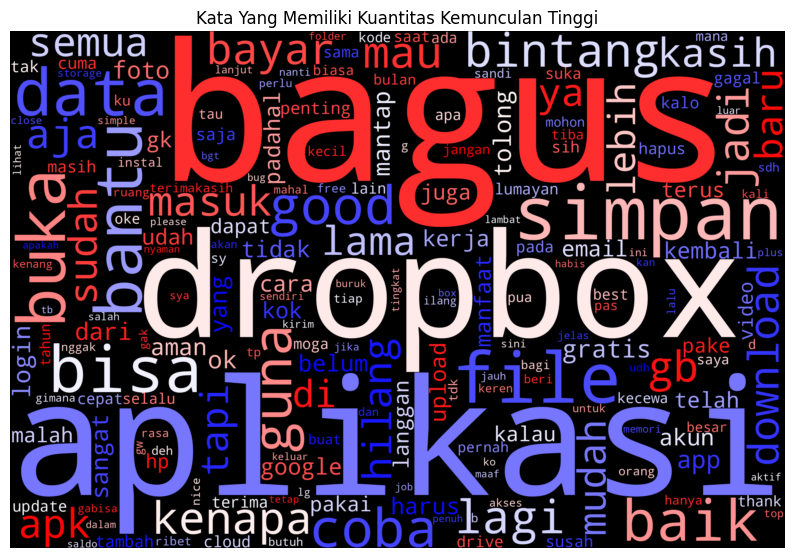

In [38]:
# Visualisasi Kata Yang Memiliki Kuantitas Kemunculan Paling Tinggi

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Kemunculan Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in data_final['steamming']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)

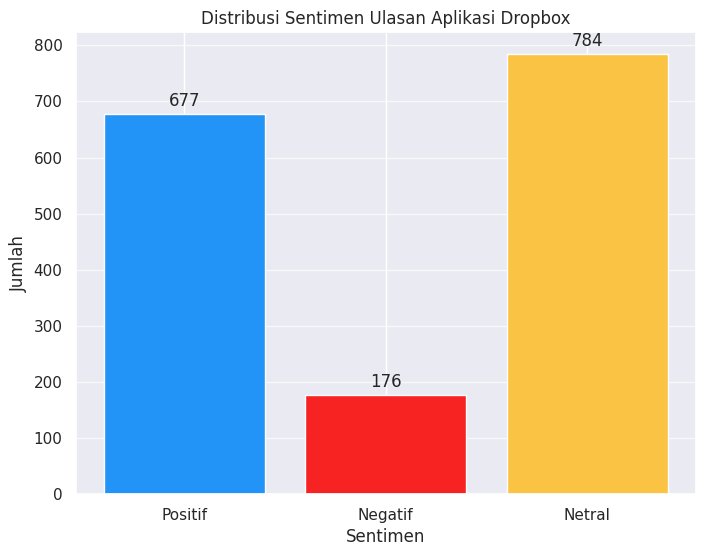

In [39]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Dropbox")

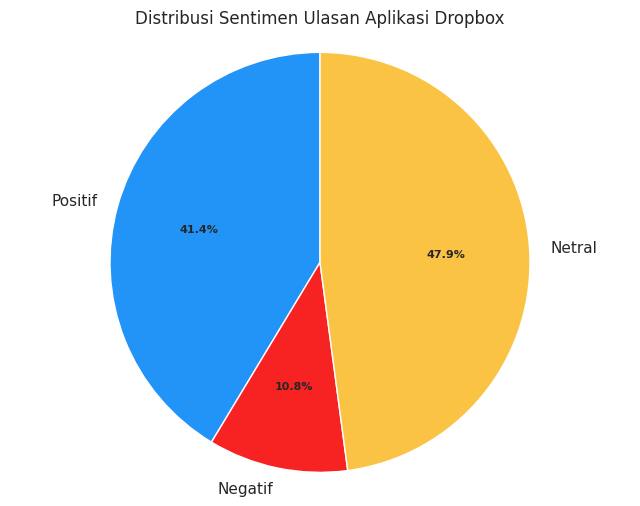

In [40]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Dropbox")

In [41]:
# Menghapus Sentimen Netral

data_final = data_final[data_final['sentimen'] != 'Netral']
data_final

,steamming,steamming_en,sentimen
1,asu,Shit.,Negatif
2,bagus,Good.,Positif
4,terima kasih untuk produk sangat manfaat,Thank you for the product's very beneficial,Positif
5,hati file tiba hilang gabisa percaya,"fontcolor="" # FFFF00""heartfile arriving fontco...",Negatif
6,keren sdh lama bgt pake dropbox awet banget,It's been a long time in a dropbox. It's been ...,Negatif
...,...,...,...
1625,lumayan bagus laaah,It's pretty good.,Positif
1629,bagus bantu,Good. Help.,Positif
1630,beri belum tahu lebih lanjut kegunaanya,Tell me more about its usefulness.,Positif
1635,mudah sya simpan file,It's easy to save files.,Positif


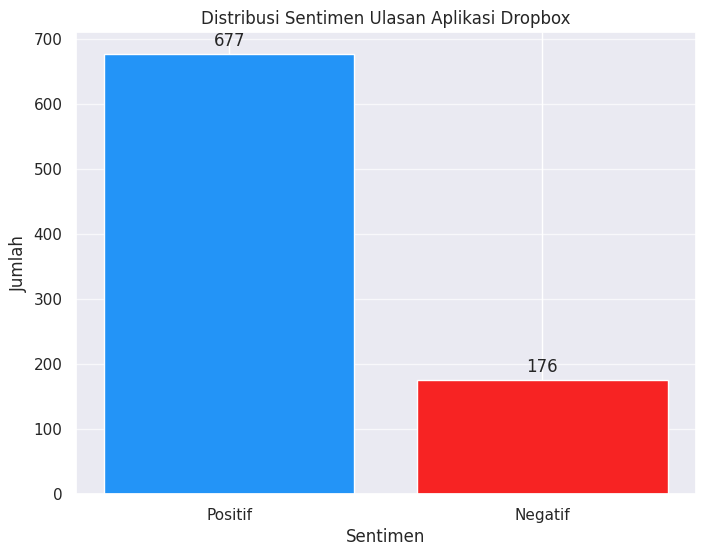

In [42]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Dropbox")

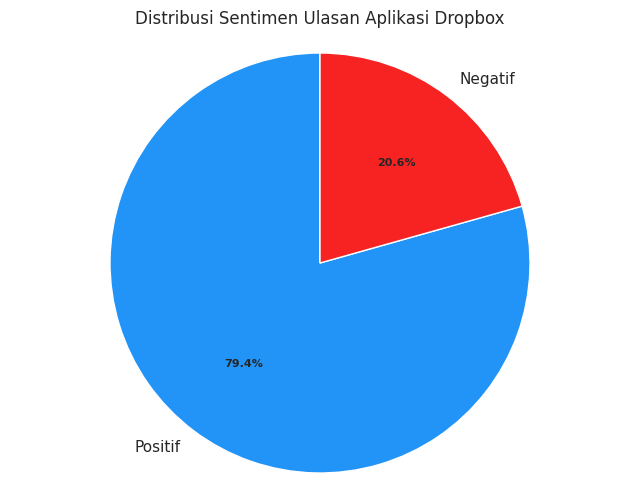

In [43]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Dropbox")

In [44]:
# Replace Data Sentimen

data_final = data_final.replace({'Positif':0, 'Negatif':1})
data_final

,steamming,steamming_en,sentimen
1,asu,Shit.,1
2,bagus,Good.,0
4,terima kasih untuk produk sangat manfaat,Thank you for the product's very beneficial,0
5,hati file tiba hilang gabisa percaya,"fontcolor="" # FFFF00""heartfile arriving fontco...",1
6,keren sdh lama bgt pake dropbox awet banget,It's been a long time in a dropbox. It's been ...,1
...,...,...,...
1625,lumayan bagus laaah,It's pretty good.,0
1629,bagus bantu,Good. Help.,0
1630,beri belum tahu lebih lanjut kegunaanya,Tell me more about its usefulness.,0
1635,mudah sya simpan file,It's easy to save files.,0


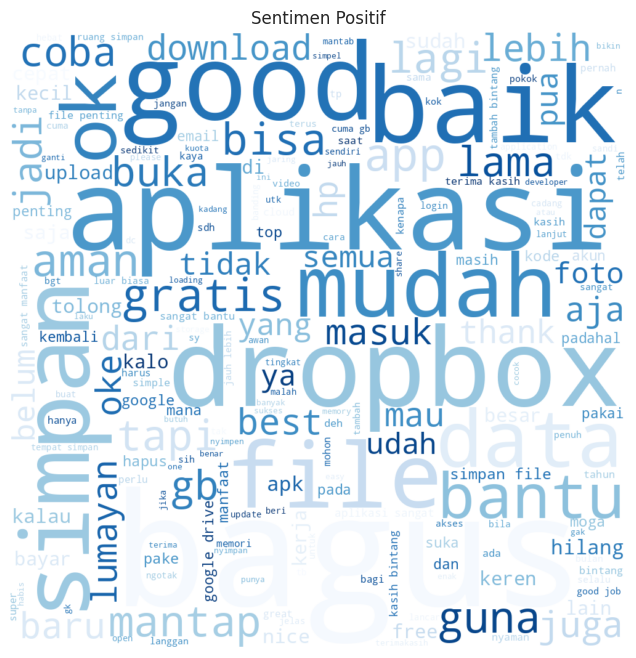

In [45]:
# Visualisasi Wordcould Positif & Negatif

data_positif = data_final[data_final['sentimen'] == 0]
data_negatif = data_final[data_final['sentimen'] == 1]

# Sentimen Positif

all_words = ' '.join([reviews for reviews in data_positif['steamming']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

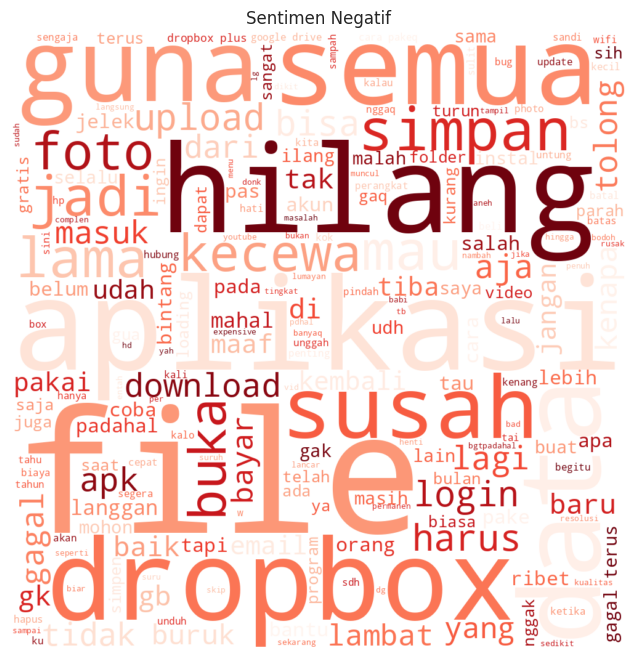

In [46]:
# Sentimen Negatif

all_words = ' '.join([reviews for reviews in data_negatif['steamming']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

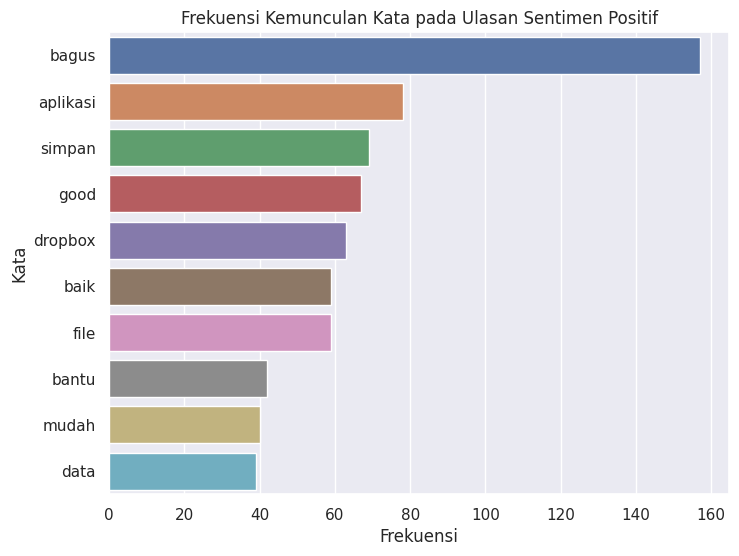

In [47]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif

# Memfilter ulasan dengan sentimen positif
positive_reviews = data_final[data_final['sentimen'] == 0]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(positive_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 10
top_words_positive = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_positive)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Positif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [48]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen positif : \n")
print(top_words_positive.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen positif : 

    kata  frekuensi
   bagus        157
aplikasi         78
  simpan         69
    good         67
 dropbox         63
    baik         59
    file         59
   bantu         42
   mudah         40
    data         39


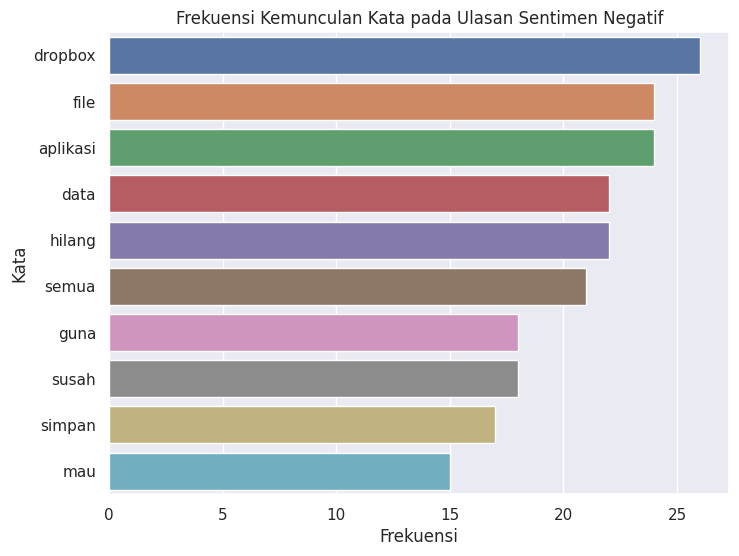

In [49]:
# Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif

# Memfilter ulasan dengan sentimen positif
negative_reviews = data_final[data_final['sentimen'] == 1]['steamming'].tolist()

# Menggunakan CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')  # Anda bisa menambahkan stop words lainnya jika perlu
word_counts = vectorizer.fit_transform(negative_reviews)
word_frequencies = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))

# Mengubah dictionary menjadi dataframe untuk memudahkan visualisasi
word_freq_df = pd.DataFrame(word_frequencies.items(), columns=['kata', 'frekuensi']).sort_values(by='frekuensi', ascending=False)

# Membatasi ke N kata yang paling sering muncul
N = 10
top_words_negative = word_freq_df.head(N)

# Membuat bar plot menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='frekuensi', y='kata', hue='kata', legend=False, data=top_words_negative)
plt.title('Frekuensi Kemunculan Kata pada Ulasan Sentimen Negatif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()

In [50]:
# Jumlah detail kata yang sering muncul

print("Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : \n")
print(top_words_negative.to_string(index=False))

Jumlah detail kata yang sering muncul pada ulasan sentimen Negatif : 

    kata  frekuensi
 dropbox         26
    file         24
aplikasi         24
    data         22
  hilang         22
   semua         21
    guna         18
   susah         18
  simpan         17
     mau         15


In [51]:
# Menghitung Jumlah Sentimen Positif, Negatif

data_final['sentimen'].value_counts()

,count
sentimen,
0,677
1,176


# **Transormation & Data Preparation**

In [52]:
# Memisahkan data menjadi data latih dan data uji [ Splitting Data ]

X = data_final['steamming']
y = data_final['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [53]:
# Menggunakan TF - IDF Vectorizer untuk mengubah teks menjadi fitur numerik [ Text Vectorizer ]

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [54]:
# Melakukan oversampling menggunakan Random Over-Sampling pada data latih

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_vec, y_train)

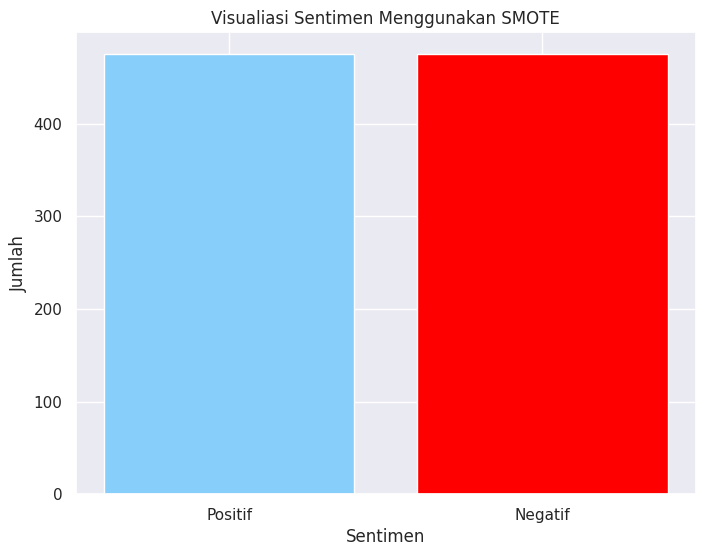

In [55]:
# Visualiasi data hasil resampling menggunakan SMOTE

sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['lightskyblue', 'red'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Positif', 'Negatif'])
plt.show()

# **Data Mining**

In [56]:
# Import Library Warning
import warnings
warnings.filterwarnings('ignore')

In [57]:
# Membangun Model Naive Bayes Classifier

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [58]:
y_pred = naive_bayes.predict(X_test_vec)

# **Interpretation / Evaluation**


1.   Classification Report
2.   Confusion Matrix
3.   Classification Accuracy
4.   Classification Error




In [59]:
# Classification Report

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Positif', 'Negatif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.828125

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Positif       0.95      0.83      0.88       202
     Negatif       0.56      0.83      0.67        54

    accuracy                           0.83       256
   macro avg       0.76      0.83      0.78       256
weighted avg       0.87      0.83      0.84       256



In [60]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])

print('\nTrue Negatives (TN) = ', cm[1, 1])

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])



print('\nAccuracy = ', accuracy)

Confusion matrix

 [[167  35]
 [  9  45]]

True Positives (TP) =  167

True Negatives (TN) =  45

False Positives (FP) =  35

False Negatives (FN) =  9

Accuracy =  0.828125


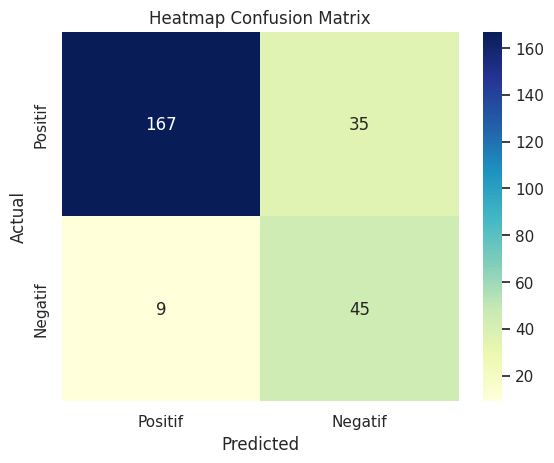

In [61]:
# Visualisasi Heatmap Confusion Matrix

cm_matrix = pd.DataFrame(data=cm, columns=['Positif','Negatif'],
                         index=['Positif','Negatif'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap Confusion Matrix')
plt.show()

In [62]:
# Slicing Confusion Matrix

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [63]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8281


In [64]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1719


# **Testing**

In [68]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")


Masukkan Teks Baru : Akun saya tiba-tiba hilang dengan sendirinya, saya tidak dapat masuk menggunakan email dan kata sandi. Saya menyesal karena banyak file penting dalam akun saya, anda telah menonaktifkan akun saya tanpa ada kejelasan.
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 91.08%
Probabilitas: 91.08499843474581 %


In [69]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : file saya hilang, sungguh menyedihkan 😭 , akun nya kenpa harus mengulang, padahal dulu aman2 saja, saya mencadangkan memory card dan save state dari epsxe Android , tapu sekarang hilang, ga tau kenapa ga bisa di unduh, akun seolah hilang tidak dikenali , dan game harus mengulang dari awal,,.
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 90.19%
Probabilitas: 90.19173221906873 %


In [70]:
# Contoh teks baru

new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)
predicted_proba = naive_bayes.predict_proba(new_text_vec)

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru : Aplikasi Bagus, sangat bermanfaat untuk penyimpanan data di cloud. Mengurangi beban memory internal. Praktos n aman
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 88.77%
Probabilitas: 88.76941515278376 %
